In [419]:
import pynapple as nap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import os
from os.path import dirname, join as pjoin
import scipy.io as sio

import pymatreader

import pandas as pd

import random
import matplotlib as mpl

import ipywidgets as widgets

import nimfa

import nemos as nmo
from nemos import _documentation_utils as doc_plots


from sklearn import linear_model

import copy


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

import seaborn as sns

import shap

In [36]:
data_dir = pjoin('C:\\Users\\Acer\\Documents\\compNeuroProjects\\neural_reco_offline\\Duszkiewicz2024', 'Dataset_2', 'A3705-200306', 'Data')
spikeData_fname = pjoin(data_dir, 'SpikeData.mat')
ahv_fname = pjoin(data_dir, 'Ahv.mat')
behav_epochs_fname = pjoin(data_dir, 'BehavEpochs.mat')
angle_fname = pjoin(data_dir, 'Angle.mat')
epoch_ts_fname = pjoin(data_dir, 'Epoch_TS.csv')
tracking_fname = pjoin(data_dir, "Tracking_data.csv")
CellTypes_fname = pjoin(data_dir, "CellTypes.mat")



In [465]:
os.listdir(data_dir)

['._Ahv.mat',
 '._Angle.mat',
 '._BehavEpochs.mat',
 '._BrainArea.mat',
 '._CellDepth.mat',
 '._CellTypes.mat',
 '._Epoch_TS.csv',
 '._Position.mat',
 '._SpikeData.mat',
 '._Tracking_data.csv',
 '._Velocity.mat',
 '._WaveformFeatures.mat',
 '._Waveforms.mat',
 'Ahv.mat',
 'Angle.mat',
 'BehavEpochs.mat',
 'BrainArea.mat',
 'CellDepth.mat',
 'CellTypes.mat',
 'Epoch_TS.csv',
 'Position.mat',
 'SpikeData.mat',
 'Tracking_data.csv',
 'Velocity.mat',
 'WaveformFeatures.mat',
 'Waveforms.mat']

In [38]:
spikeData = pymatreader.read_mat(spikeData_fname)
ahv = pymatreader.read_mat(ahv_fname)
behav_epochs = pymatreader.read_mat(behav_epochs_fname)
angleData = pymatreader.read_mat(angle_fname)
CellTypesData = pymatreader.read_mat(CellTypes_fname)


print(behav_epochs.keys())
print(spikeData.keys())
print(angleData.keys())



dict_keys(['__header__', '__version__', '__globals__', 'sleep1Ep', 'sleep1Ep_Info', 'wake1Ep', 'wake1Ep_Info', 'sleep2Ep', 'sleep2Ep_Info', 'wake2Ep', 'wake2Ep_Info'])
dict_keys(['__header__', '__version__', '__globals__', 'S', 'S_Info', 'shank', 'shank_Info', 'cellIx', 'cellIx_Info'])
dict_keys(['__header__', '__version__', '__globals__', 'ang', 'ang_Info'])


In [21]:
sum(CellTypesData['fs'])

np.uint8(25)

In [39]:
tracking_data = pd.read_csv(tracking_fname)
epoch_ts = pd.read_csv(epoch_ts_fname)

In [41]:
time_hd = angleData['ang']['t']
ang_rad = angleData['ang']['data']
ahv_data = ahv['ahv']['data']
x_circ = np.cos(ang_rad)[1000:2000]
y_circ = np.sin(ang_rad)[1000:2000]
amp_circ = time_hd[1000:2000]
# plt.scatter(amp_circ*x_circ, amp_circ*y_circ, s = 5, c='k', marker='.', alpha=0.8)
# # plt.plot(time_hd, np.sin(hd))
# # plt.plot(time_hd, hd)
# ax = plt.gca()


In [25]:
ahv['ahv']['t']

array([ 5034.104,  5034.114,  5034.124, ..., 16195.94 , 16195.95 ,
       16195.96 ])

In [27]:
def plot_chunk(iter_):

    global time_hd, angleData, chunk_period, slide_period, n_chunks, time_dt, time_hd, rad, plot_time_window, slide_window



    fig, ax = plt.subplots()
    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])

    chunk_period = 1
    slide_period = 0.25
    n_chunks = (time_hd.max() - time_hd.min())/chunk_period 
    time_dt = time_hd[1]-time_hd[0]

    time_hd = angleData['ang']['t']
    rad = angleData['ang']['data']


    plot_time_window = chunk_period/time_dt
    slide_window = (slide_period/time_dt)

    # iter_ = 0
    t_start = int(iter_*slide_window)
    t_end = t_start + int(plot_time_window)
        
    x_circ = np.cos(rad)[t_start:t_end]
    y_circ = np.sin(rad)[t_start:t_end]

    x_circ_end = x_circ[-1]
    y_circ_end = y_circ[-1]
        
    scattr1 = plt.scatter(x_circ, y_circ, s = 5, c='k', marker='.', alpha=0.8)
    scattr2 = plt.scatter(x_circ_end, y_circ_end, s = 25, c='r', marker='o', alpha=0.8)
    line = plt.plot([0,x_circ_end], [0,y_circ_end], linewidth=2, color='r')


In [ ]:
widgets.interact(plot_chunk, iter_=widgets.Play(min=0, max=90));

In [589]:
behav_epochs

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Jun  1 15:32:21 2021',
 '__version__': '1.0',
 '__globals__': [],
 'sleep1Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 5e-05,
  'stop': 5030.424},
 'sleep1Ep_Info': 'No info',
 'wake1Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 5030.424,
  'stop': 7669.116},
 'wake1Ep_Info': 'No info',
 'sleep2Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 7669.116,
  'stop': 13710.71},
 'sleep2Ep_Info': 'No info',
 'wake2Ep': {'units': {'quantity': 'time', 'unit': 'ts', 'value': 1},
  'start': 13710.71,
  'stop': 16198.56},
 'wake2Ep_Info': 'No info'}

In [42]:
wake_epochs = nap.IntervalSet(start=[behav_epochs['wake1Ep']['start'], behav_epochs['wake2Ep']['start']], end=[behav_epochs['wake1Ep']['stop'], behav_epochs['wake2Ep']['stop']])
sleep_epochs = nap.IntervalSet(start=[behav_epochs['sleep1Ep']['start'], behav_epochs['sleep2Ep']['start']], end=[behav_epochs['sleep1Ep']['stop'], behav_epochs['sleep2Ep']['stop']])
print(wake_epochs)
print(sleep_epochs)


  index     start       end
      0   5030.42   7669.12
      1  13710.7   16198.6
shape: (2, 2), time unit: sec.
  index     start       end
      0     5e-05   5030.42
      1  7669.12   13710.7
shape: (2, 2), time unit: sec.


In [43]:
spikeData.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S', 'S_Info', 'shank', 'shank_Info', 'cellIx', 'cellIx_Info'])

In [44]:
sp_times = spikeData["S"]['C']
cell_ids = spikeData["cellIx"]
len(sp_times) == len(cell_ids)

True

In [45]:
l_cellids = []
for i in range(len(cell_ids)):
    if (type(sp_times[i]['tsd']['t']) == type(np.arange(10))) and (len(sp_times[i]['tsd']['t']) > 1000):
        l_cellids.append(cell_ids[i])
        # len(sp_times[i]['tsd']['t'])
# l_cellids

In [64]:
spData = {

    cell_id:nap.Ts(t=sp_times[cell_ind]['tsd']['t']) for cell_ind,cell_id in enumerate(l_cellids)

}

# sp_times_counter = nap.TsGroup(spData, time_support=counter_epochs)

sp_times_wake = nap.TsGroup(spData, time_support=wake_epochs)


head_direction = nap.Tsd(

    t = angleData['ang']['t'],
    d = angleData['ang']['data'],
    time_support=wake_epochs
    )

angular_velocity = nap.Tsd(

    t = ahv['ahv']['t'],
    d = ahv['ahv']['data']
    )

# count1 = sp_times_wake.count(bin_size=1.0, time_units='s')
# print(count1) 

In [47]:
tuning_curve_wake = nap.compute_1d_tuning_curves(

    group = sp_times_wake,
    feature=head_direction,
    nb_bins=120,
    minmax=(-np.pi, np.pi)
)

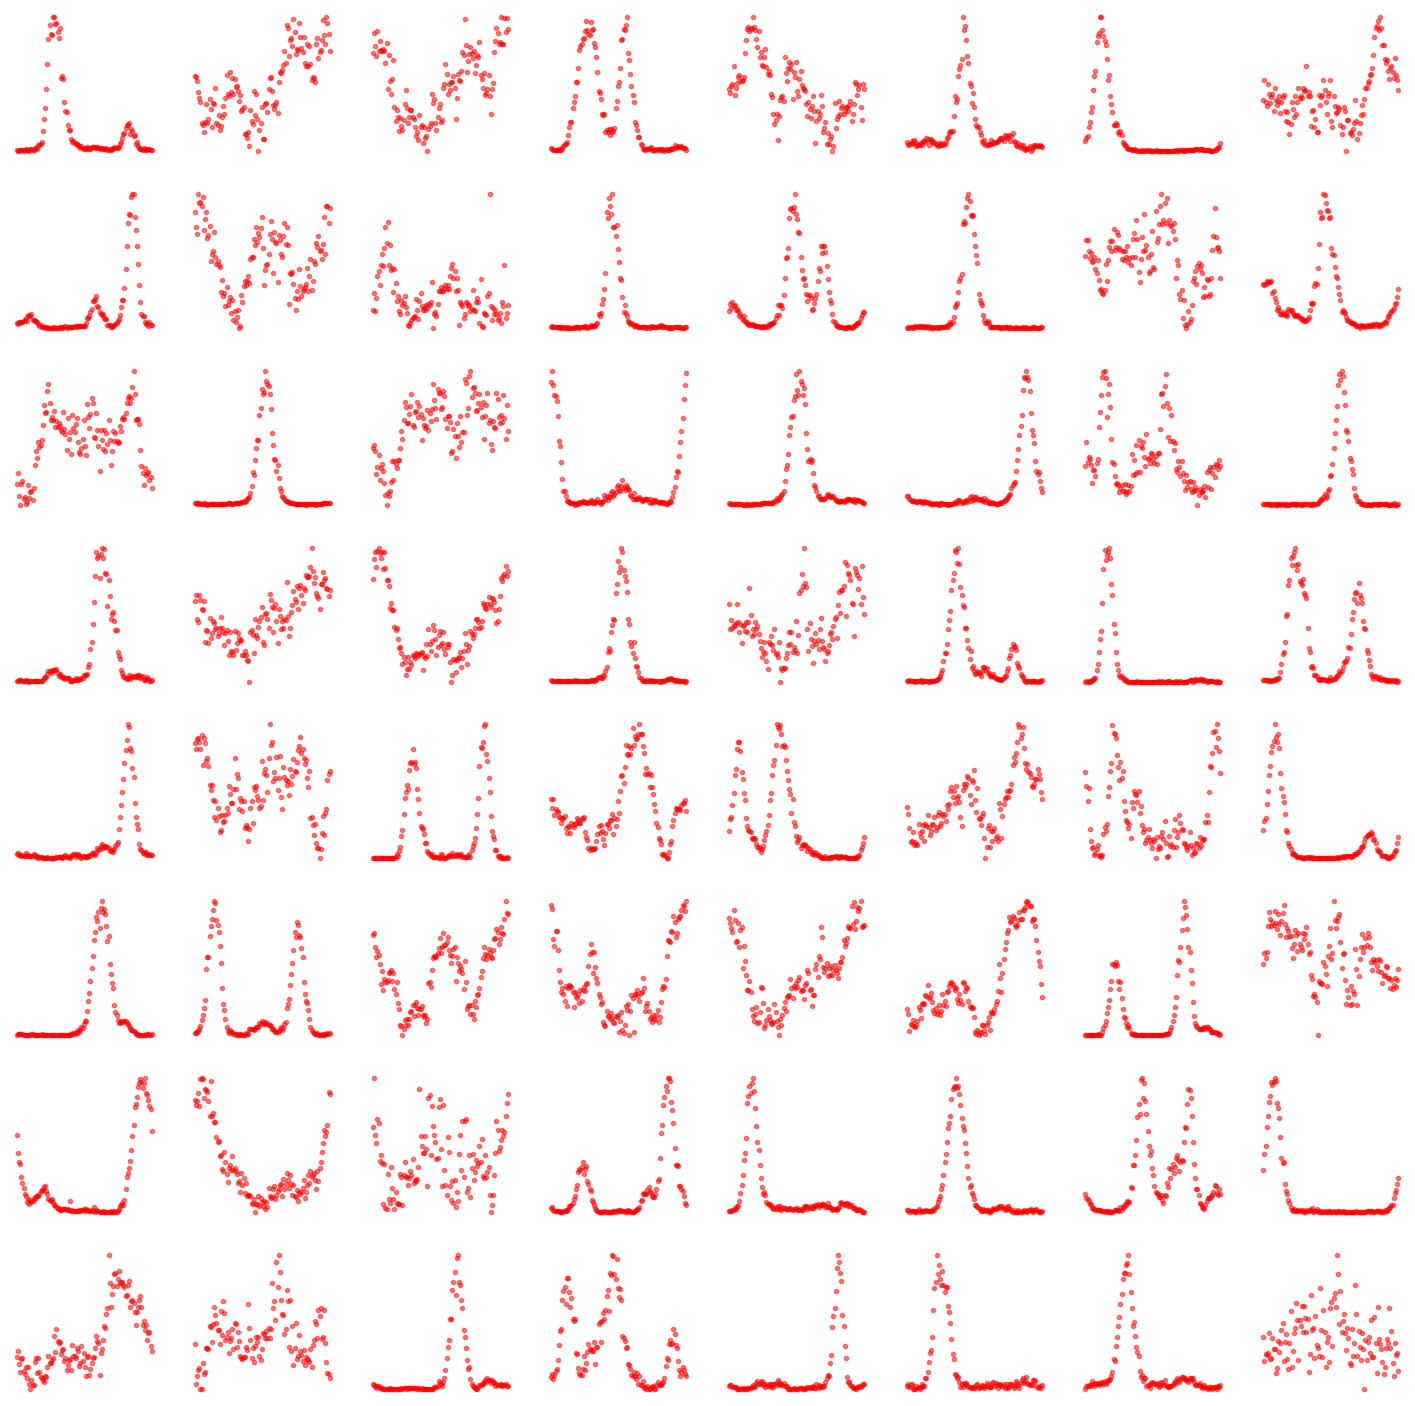

In [48]:
fig, axes = plt.subplots(8,8, figsize=(18,18), subplot_kw={'facecolor':'#ebf5ff'})

in_tune = 0
for i_ax in range(8):
    for j_ax in range(8):
        
        axes[i_ax, j_ax].scatter(tuning_curve_wake[l_cellids[in_tune]].axes[0].tolist(), tuning_curve_wake[l_cellids[in_tune]].tolist(), c='r', marker='.', plotnonfinite=True, alpha=0.5)
        # axes[i_ax, j_ax].scatter(tuning_curve_sleep[in_tune].axes[0].tolist(), tuning_curve_sleep[in_tune].tolist(), c='k', marker='.', plotnonfinite=True, alpha=0.5)
        axes[i_ax, j_ax].set_axis_off()
        in_tune += 1


In [67]:
sp_times_wake.getby_threshold("rate", 1.0)

Index    rate
-------  --------
2        2.36417
3        12.23632
4        17.88808
5        5.42764
6        11.60002
7        1.61844
8        6.30483
...      ...
111      31.86807
112      6.41583
113      2.74376
115      4.26974
116      6.89217
117      2.4063
118      6.72461

In [72]:
# # plt.figure(figsize = (34,34))
# fig = doc_plots.plot_head_direction_tuning(
#     tuning_curve_wake, sp_times_wake, head_direction, threshold_hz=0, start=6000, end=6010, figsize=(34,34)
# )

In [ ]:
wake_ep1 = nap.IntervalSet(start=[behav_epochs['wake1Ep']['start']], end=[behav_epochs['wake1Ep']['stop']])


bin_size = 0.5
count_ep1 = sp_times_wake.count(bin_size, ep=wake_ep1)

In [405]:
sp_times_slp = nap.TsGroup(spData, time_support=sleep_epochs)
sleep_ep1 = nap.IntervalSet(start=[behav_epochs['sleep1Ep']['start']], end=[behav_epochs['sleep1Ep']['stop']])
bin_size = 0.5
count_ep2 = sp_times_slp.count(bin_size, ep=sleep_ep1)

In [407]:


def find_predictorNeurons_for_each_neuron(count_ep1):

    col_names = count_ep1.columns
    #len(col_names)
    col_indices = np.arange(len(col_names), dtype=np.int32).tolist()

    l_imp_neurons = []

    for ind_neuron in col_indices: 

        col_indices_copy = copy.deepcopy(col_indices)

        ele_popped = col_indices_copy.pop(ind_neuron)
        every_othr_ele = col_indices_copy

        if (not CellTypesData['fs'][ele_popped]) and (not CellTypesData['ex'][ele_popped]):
            continue

        # print("element popped: ", ele_popped)
        # print("other neurons indices: ", every_othr_ele)
        # print("other neurons: ", col_names[every_othr_ele])

        # plt.plot(count_ep1[:,ele_popped])
        # ax = plt.gca()
        # st_t = wake_ep1['start'][0]
        # end_t = st_t + 100
        # ax.set_xlim([st_t, end_t])

        # print("Firing rate of predictor neurons : ", count_ep1[:, every_othr_ele])

        X = count_ep1[:, every_othr_ele].as_array()
        # X = np.array(X)
        y = count_ep1[:, ele_popped]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

        clf = RandomForestClassifier(n_estimators=100, random_state=42)

        clf.fit(X_train, y_train)

        # count_ep1[:, every_othr_ele].as_array()
        feature_names = every_othr_ele
        importances = clf.feature_importances_

        # Permutation feature importance
        
        result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
        perm_imp_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)


        
        arr = perm_imp_df['Permutation Importance']
        sorted_indices = sorted(range(len(arr)), key=lambda k: arr[k], reverse=True)
        indices_imp_neurons = perm_imp_df['Feature'][sorted_indices][:10]

        important_neurons = {'neuron_index': ele_popped, 'indices_imp_neurons':indices_imp_neurons.values, 
                     'num_fs': sum(CellTypesData['fs'][indices_imp_neurons.values]), 
                     'num_ex': sum(CellTypesData['ex'][indices_imp_neurons.values]), 
                     'is_fs':CellTypesData['fs'][ele_popped],
                     'is_ex':CellTypesData['ex'][ele_popped]
                     }
        l_imp_neurons.append(important_neurons)
        
    return l_imp_neurons

        

In [ ]:
l_imp_neurons = find_predictorNeurons_for_each_neuron(count_ep1)


In [ ]:
l_imp_neurons_slp = find_predictorNeurons_for_each_neuron(count_ep2)

In [ ]:
l_imp_neurons_slp

In [413]:
l_inh_frac_fs = []
l_inh_frac_ex = []

for neuron in l_imp_neurons:
    num_fs = neuron['num_fs']
    num_ex = neuron['num_ex']
    if neuron['is_fs']:
        l_inh_frac_fs.append(num_fs/(num_fs + num_ex))
    elif neuron['is_ex']:
        l_inh_frac_ex.append(num_fs/(num_fs + num_ex))

In [414]:
l_inh_frac_fs_slp = []
l_inh_frac_ex_slp = []

for neuron in l_imp_neurons_slp:
    num_fs = neuron['num_fs']
    num_ex = neuron['num_ex']
    if neuron['is_fs']:
        l_inh_frac_fs_slp.append(num_fs/(num_fs + num_ex))
    elif neuron['is_ex']:
        l_inh_frac_ex_slp.append(num_fs/(num_fs + num_ex))

In [435]:
l_neuron_type = []
l_inh_inf_frac = []
l_exc_or_inh = []
l_sleep_or_wake = []


for ele_fs in l_inh_frac_fs:
    l_neuron_type.append('Inhibitory')
    l_inh_inf_frac.append(ele_fs)
    l_exc_or_inh.append('inh')
    l_sleep_or_wake.append('awake')

for ele_fs in l_inh_frac_fs_slp:
    l_neuron_type.append('Inhibitory - Sleep')
    l_inh_inf_frac.append(ele_fs)
    l_exc_or_inh.append('inh')
    l_sleep_or_wake.append('sleep')
    
for ele_ex in l_inh_frac_ex:
    l_neuron_type.append('Excitatory')
    l_inh_inf_frac.append(ele_ex)
    l_exc_or_inh.append('exc')
    l_sleep_or_wake.append('awake')

for ele_ex in l_inh_frac_ex_slp:
    l_neuron_type.append('Excitatory - Sleep')
    l_inh_inf_frac.append(ele_ex)
    l_exc_or_inh.append('exc')
    l_sleep_or_wake.append('sleep')

In [453]:
dic_tobe_df_soon = {'neuron_type': l_neuron_type, 'fraction_of_inhibitory_influence': l_inh_inf_frac}#, 'eori':l_exc_or_inh, 'is_sleep':l_sleep_or_wake 

In [454]:
df_frac_inh_inf = pd.DataFrame.from_dict(dic_tobe_df_soon)

In [455]:
df_frac_inh_inf

,neuron_type,fraction_of_inhibitory_influence
0,Inhibitory,0.875000
1,Inhibitory,0.777778
2,Inhibitory,0.555556
3,Inhibitory,0.555556
4,Inhibitory,0.700000
...,...,...
187,Excitatory - Sleep,0.250000
188,Excitatory - Sleep,0.222222
189,Excitatory - Sleep,0.333333
190,Excitatory - Sleep,0.125000


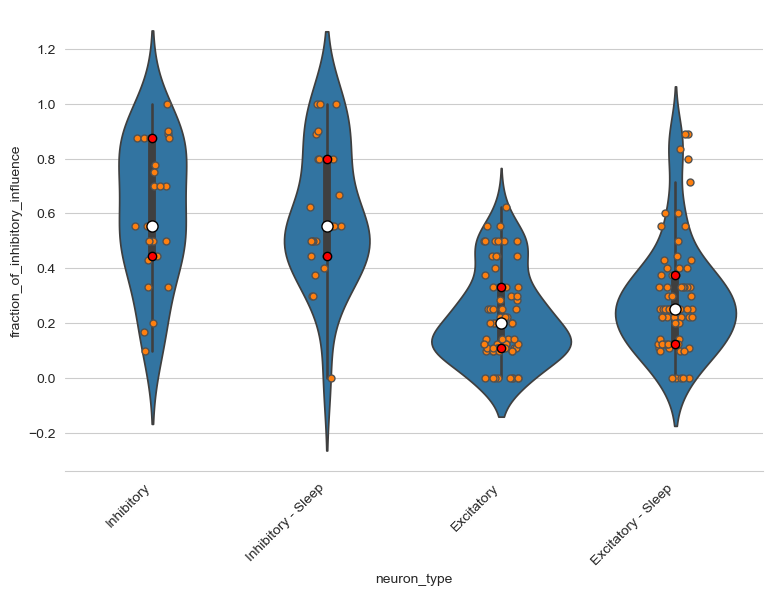

In [459]:
# Change to a bit better style and larger figure.
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(9, 6))

# Plot our violins.
sns.violinplot(x='neuron_type', y='fraction_of_inhibitory_influence', data=df_frac_inh_inf)

sns.stripplot(x='neuron_type', y='fraction_of_inhibitory_influence', data=df_frac_inh_inf,
              jitter=True, linewidth=1)

medians = df_frac_inh_inf.groupby('neuron_type').median().reset_index()
q25 = df_frac_inh_inf.groupby('neuron_type').quantile(0.25).reset_index()
q75 = df_frac_inh_inf.groupby('neuron_type').quantile(0.75).reset_index()

sns.swarmplot(x='neuron_type', y='fraction_of_inhibitory_influence', data=medians,
              color='white', edgecolor='black', linewidth=1, size=8)

sns.swarmplot(x='neuron_type', y='fraction_of_inhibitory_influence', data=q25,
              color='red', edgecolor='black', linewidth=1, size=6)

sns.swarmplot(x='neuron_type', y='fraction_of_inhibitory_influence', data=q75,
              color='red', edgecolor='black', linewidth=1, size=6)


# Rotate the x-axis labels and remove the plot border on the left.
_ = plt.xticks(rotation=45, ha='right')
sns.despine(left=True)

In [461]:
import scipy.stats as stats

# Sample data
group1 = l_inh_frac_fs
group2 = l_inh_frac_fs_slp

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(group1, group2)

print(f"U-statistic: {u_stat}, p-value: {p_value}")


U-statistic: 319.5, p-value: 0.8992645084000047


#### There is no statistically significant difference between the inhibitory neurons between awake and sleep epochs in terms of fraction of inhibitory (out of the top ten influencers) neurons that shape their activity

##### U-statistic: 319.5, p-value: 0.8992645084000047

In [462]:
# Sample data
group1 = l_inh_frac_ex
group2 = l_inh_frac_ex_slp

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(group1, group2)

print(f"U-statistic: {u_stat}, p-value: {p_value}")

U-statistic: 1980.0, p-value: 0.027146584809893612


#### On the other hand, there is a statistically significant difference between the excitatory neurons between awake and sleep epochs in terms of fraction of inhibitory (out of the top ten influencers) neurons that shape their activity

##### U-statistic: 1980.0, p-value: 0.027146584809893612